In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [17]:
A = tf.placeholder(tf.float32, shape=(5,5), name='A')
v = tf.placeholder(tf.float32)

u = tf.matmul(A, v)

with tf.Session() as session:
    output = session.run(u, feed_dict={A: np.random.randn(5,5), v: np.random.randn(5,1)})
    print( output, type(output) )
    

[[ 0.53334683]
 [-1.25067043]
 [-0.31465977]
 [-0.20693171]
 [-2.2446475 ]] <class 'numpy.ndarray'>


In [18]:
u = tf.Variable(20.0)
cost = u*u + u + 1.0

train_op = tf.train.GradientDescentOptimizer(0.3).minimize(cost)

init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    for i in range(20):
        session.run(train_op)
        print("i = {}, cost = {}, u = {}".format(i, cost.eval(), u.eval()))

i = 0, cost = 67.98999786376953, u = 7.699999809265137
i = 1, cost = 11.508398056030273, u = 2.7799997329711914
i = 2, cost = 2.471343517303467, u = 0.8119997978210449
i = 3, cost = 1.0254149436950684, u = 0.024799883365631104
i = 4, cost = 0.7940664291381836, u = -0.2900800108909607
i = 5, cost = 0.757050633430481, u = -0.41603201627731323
i = 6, cost = 0.751128077507019, u = -0.46641281247138977
i = 7, cost = 0.7501804828643799, u = -0.48656514286994934
i = 8, cost = 0.7500288486480713, u = -0.49462607502937317
i = 9, cost = 0.7500046491622925, u = -0.4978504478931427
i = 10, cost = 0.7500007152557373, u = -0.499140202999115
i = 11, cost = 0.7500001192092896, u = -0.499656081199646
i = 12, cost = 0.75, u = -0.4998624324798584
i = 13, cost = 0.75, u = -0.4999449849128723
i = 14, cost = 0.75, u = -0.4999780058860779
i = 15, cost = 0.75, u = -0.49999120831489563
i = 16, cost = 0.75, u = -0.49999648332595825
i = 17, cost = 0.75, u = -0.4999985992908478
i = 18, cost = 0.75, u = -0.4999994

In [19]:
def y2indicator(y, K):
    '''Transfor Y into an indicator matrix
    The indicator matrix will be an NxK matrix.
    
    N : number of samples
    K : number of classes in the output
    '''
    N = len(y)
    ind = np.zeros((N, K))
    for i in range(N):
        j = int(y[i])
        ind[i, j] = 1
    return ind

def get_normalized_data():
    df = pd.read_csv('data/train.csv')
    data = df.as_matrix().astype(np.float32)
    
    np.random.shuffle(data)
    Y = data[:, 0]
    X = data[:, 1:]
    mu = X.mean(axis=0)
    std  = X.std(axis=0)
    # if value equals to 0 replace by 1
    np.place(std, std==0, 1) 
    X = (X - mu)/ std
    
    return X, Y    

def error_rate(p, t):
    return np.mean(p != t)

In [21]:
X, Y = get_normalized_data()
max_iter = 15
print_period = 50

lr = 4e-5
reg = 1e-2

Xtrain = X[:-1000,]
Xtest  = X[-1000:,]
Ytrain = Y[:-1000]
Ytest  = Y[-1000:]
K = len(np.unique(Y))
Ytrain_ind = y2indicator(Ytrain, K)
Ytest_ind = y2indicator(Ytest, K)

N, D = Xtrain.shape
batch_sz = 500
n_batches = int( N / batch_sz )
M1 = 300
M2 = 100

W1_init = np.random.randn(D, M1) / 28
b1_init = np.zeros(M1)
W2_init = np.random.randn(M1, M2) / np.sqrt(M1)
b2_init = np.zeros(M2)
W3_init = np.random.randn(M2, K) / np.sqrt(M2)
b3_init = np.zeros(K)

In [22]:
X = tf.placeholder(tf.float32, shape=(None, D), name='X')
T = tf.placeholder(tf.float32, shape=(None, K), name='T')
W1 = tf.Variable(W1_init.astype(np.float32))
b1 = tf.Variable(b1_init.astype(np.float32))
W2 = tf.Variable(W2_init.astype(np.float32))
b2 = tf.Variable(b2_init.astype(np.float32))
W3 = tf.Variable(W3_init.astype(np.float32))
b3 = tf.Variable(b3_init.astype(np.float32))

In [23]:
Z1 = tf.nn.relu( tf.matmul(X, W1) + b1 )
Z2 = tf.nn.relu( tf.matmul(Z1, W2) + b2 )
Yish = tf.matmul(Z2, W3) + b3

cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(Yish, T))

train_op = tf.train.RMSPropOptimizer(lr, decay=0.99, momentum=0.9).minimize(cost)

predict_op = tf.arg_max(Yish, 1)

Cost / err at iteration i=0, j=0: 2380.166015625 / 0.922
Cost / err at iteration i=0, j=50: 375.2212219238281 / 0.112
Cost / err at iteration i=1, j=0: 285.5705871582031 / 0.092
Cost / err at iteration i=1, j=50: 236.3982696533203 / 0.07
Cost / err at iteration i=2, j=0: 201.9309844970703 / 0.064
Cost / err at iteration i=2, j=50: 181.1438751220703 / 0.048
Cost / err at iteration i=3, j=0: 160.424560546875 / 0.049
Cost / err at iteration i=3, j=50: 151.72610473632812 / 0.042
Cost / err at iteration i=4, j=0: 136.48953247070312 / 0.042
Cost / err at iteration i=4, j=50: 135.06500244140625 / 0.035
Cost / err at iteration i=5, j=0: 122.59333801269531 / 0.039
Cost / err at iteration i=5, j=50: 127.55461120605469 / 0.032
Cost / err at iteration i=6, j=0: 114.55489349365234 / 0.034
Cost / err at iteration i=6, j=50: 122.54220581054688 / 0.03
Cost / err at iteration i=7, j=0: 112.03424072265625 / 0.031
Cost / err at iteration i=7, j=50: 118.84175109863281 / 0.029
Cost / err at iteration i=8, 

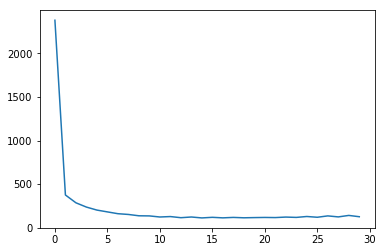

In [24]:
LL = []
init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    
    for i in range(max_iter):
        for j in range(n_batches):
            Xbatch = Xtrain[j*batch_sz: (j*batch_sz+batch_sz),]
            Ybatch = Ytrain_ind[j*batch_sz: (j*batch_sz+batch_sz),]
            
            session.run(train_op, feed_dict={X: Xbatch, T: Ybatch})
            if j % print_period == 0 :
                test_cost = session.run(cost, feed_dict={X: Xtest, T: Ytest_ind})
                prediction = session.run(predict_op, feed_dict={X: Xtest})
                err = error_rate(prediction, Ytest)
                print("Cost / err at iteration i={}, j={}: {} / {}".format(i, j, test_cost, err))
                LL.append(test_cost)

    plt.plot(LL)
    plt.show()